In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# we want our plots to appear inside the notebook
%matplotlib inline 


C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('heart_disease_uci.csv')

# Basic Checks 

In [3]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
data.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [5]:
data.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [6]:
data.shape

(920, 16)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [8]:
data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [9]:
data.describe( include = 'O')

,sex,dataset,cp,fbs,restecg,exang,slope,thal
count,920,920,920,830,918,865,611,434
unique,2,4,4,2,3,2,3,3
top,Male,Cleveland,asymptomatic,False,normal,False,flat,normal
freq,726,304,496,692,551,528,345,196


# Data Preprocessing And EDA 

In [10]:
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Hence, we have null value so we need to impute the null values 

# Handling Missing Values 

In [11]:
Numeric_Columns = ['trestbps', 'chol', 'thalch', 'oldpeak','ca']


In [12]:
from sklearn.impute import SimpleImputer
# Impute numeric columns with the mean value
imputer_numeric = SimpleImputer(strategy='mean')
data[Numeric_Columns] = imputer_numeric.fit_transform(data[Numeric_Columns])

In [13]:
Categorical_Columns = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [14]:
imputer_categorical = SimpleImputer(strategy='most_frequent')
data[Categorical_Columns] = imputer_categorical.fit_transform(data[Categorical_Columns])


In [15]:
#checking 
data.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

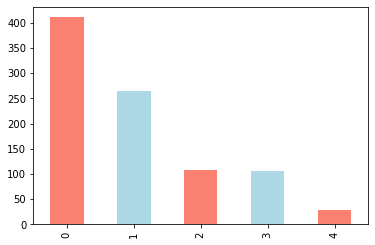

In [16]:
#target Variable 
data["num"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [17]:
# Compare target column with sex column
pd.crosstab(data.num, data.sex)

sex,Female,Male
num,,
0,144,267
1,30,235
2,10,99
3,8,99
4,2,26


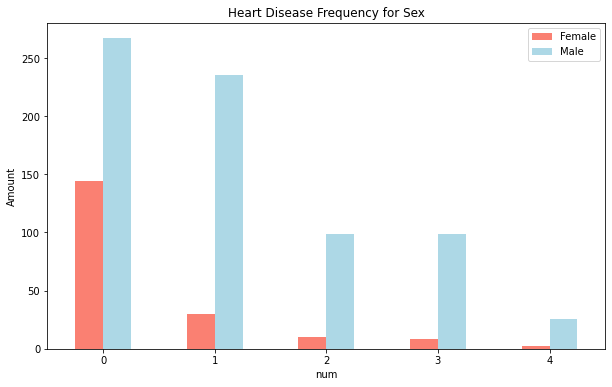

In [18]:
pd.crosstab(data.num, data.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

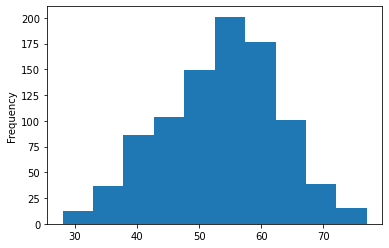

In [19]:
# Check the distribution of the age column with a histogram
data.age.plot.hist();

# Heart Disease Frequency per Chest Pain Type

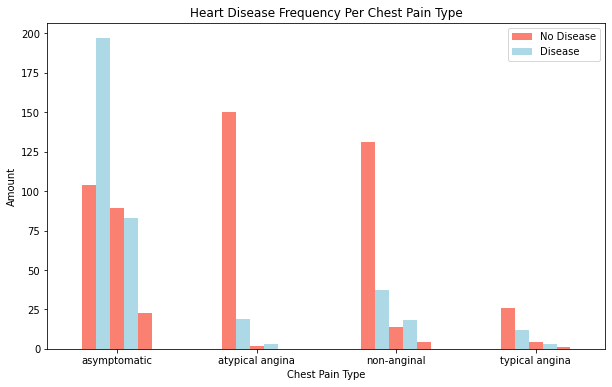

In [20]:
# Make the crosstab more visual
pd.crosstab(data.cp, data.num).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

<AxesSubplot:xlabel='age', ylabel='Count'>

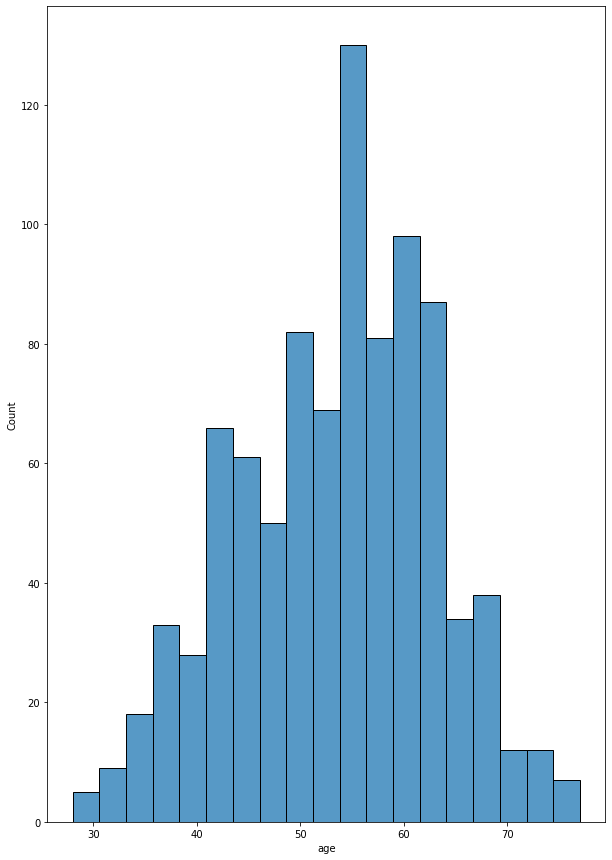

In [21]:
plt.figure(figsize=(10,15))
sns.histplot( x = 'age', data = data)


<AxesSubplot:xlabel='num', ylabel='Count'>

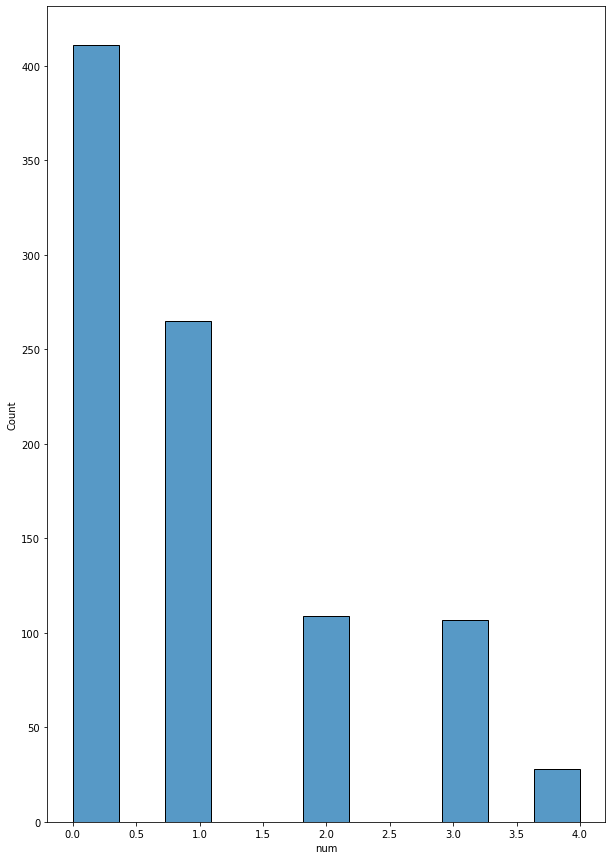

In [22]:
plt.figure(figsize=(10,15))
sns.histplot( x = 'num', data = data)

<AxesSubplot:xlabel='sex', ylabel='count'>

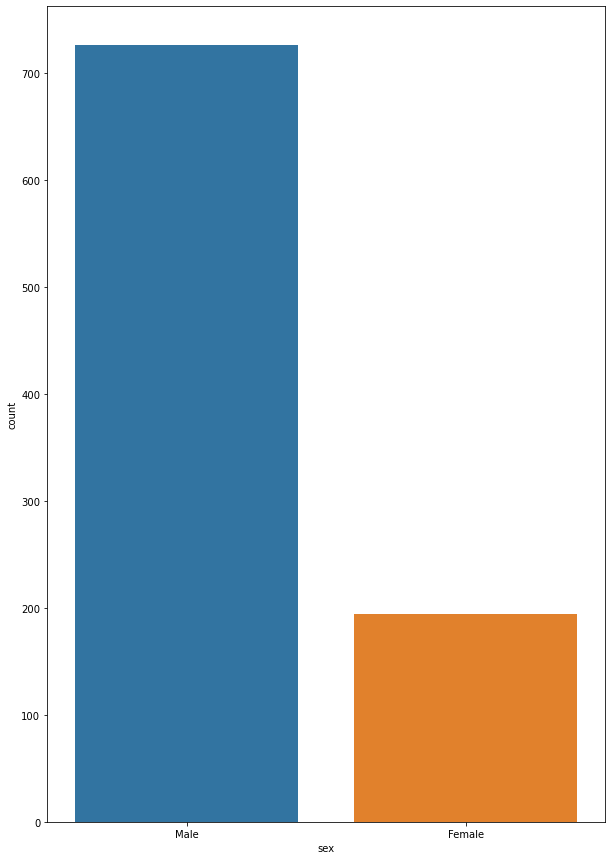

In [23]:
plt.figure(figsize=(10,15))
sns.countplot( x = 'sex', data = data)

<AxesSubplot:xlabel='cp', ylabel='count'>

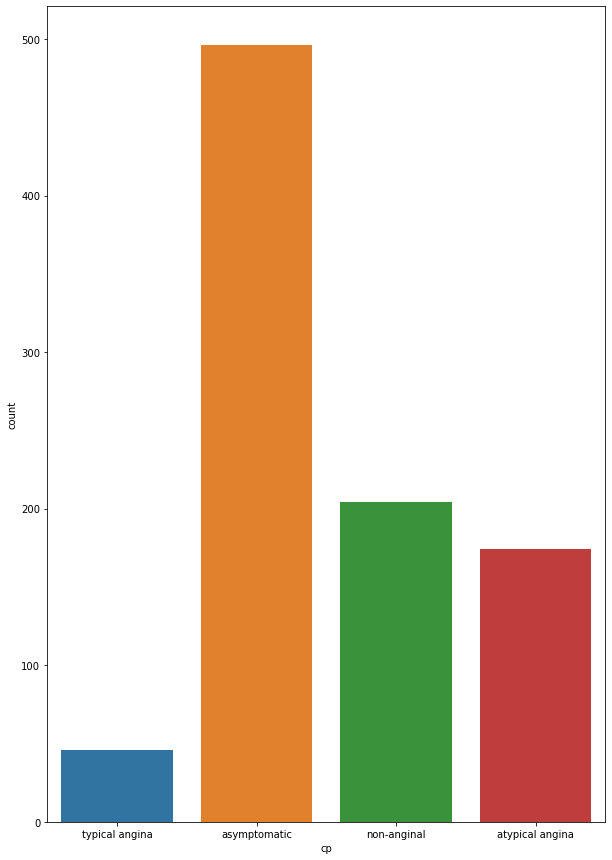

In [24]:
plt.figure(figsize=(10,15))
sns.countplot( x = 'cp', data = data)

<AxesSubplot:xlabel='slope', ylabel='count'>

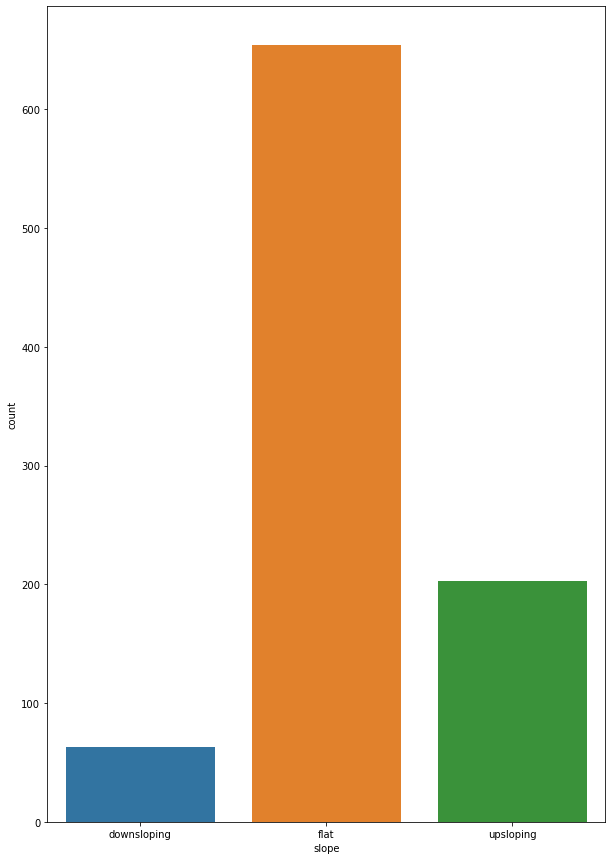

In [25]:
plt.figure(figsize=(10,15))
sns.countplot( x = 'slope', data = data)

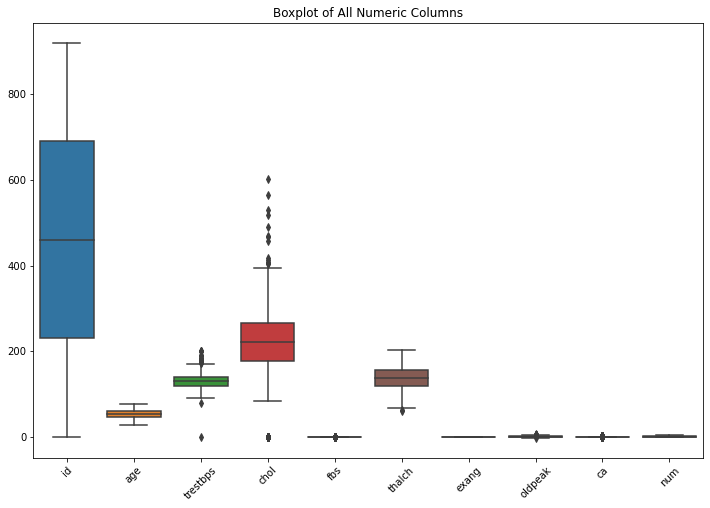

In [26]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Boxplot of All Numeric Columns')
plt.show()

(8.5, -0.5)

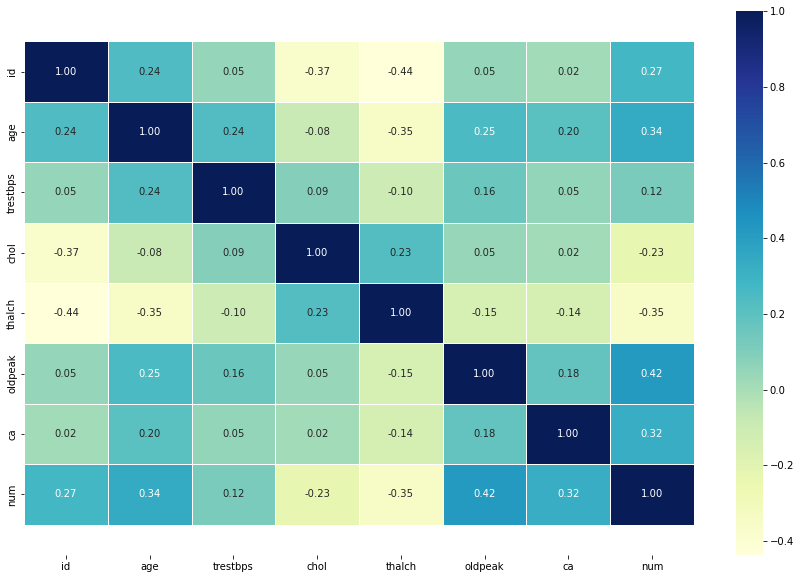

In [27]:
# Let's make our correlation matrix a little prettier
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [28]:
data.corr()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
id,1.000000,0.239301,0.049369,-0.372984,-0.436795,0.046473,0.016474,0.273552
age,0.239301,1.000000,0.235253,-0.084499,-0.353471,0.248082,0.204139,0.339596
trestbps,0.049369,0.235253,1.000000,0.088290,-0.104616,0.160268,0.051940,0.116225
chol,-0.372984,-0.084499,0.088290,1.000000,0.226325,0.045498,0.017544,-0.228238
thalch,-0.436795,-0.353471,-0.104616,0.226325,1.000000,-0.149630,-0.140644,-0.351055
oldpeak,0.046473,0.248082,0.160268,0.045498,-0.149630,1.000000,0.178886,0.421907
ca,0.016474,0.204139,0.051940,0.017544,-0.140644,0.178886,1.000000,0.321404
num,0.273552,0.339596,0.116225,-0.228238,-0.351055,0.421907,0.321404,1.000000


# Dropping Unnecessary columns 

In [29]:
data=data.drop(columns=['id','dataset'])

In [30]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Converting Categorical Values to Numerical 

1.Sex

In [31]:
data['sex'] = data['sex'].map({'Male':'0', 'Female':'1'})

In [32]:
data.sex

0      0
1      0
2      0
3      0
4      1
      ..
915    1
916    0
917    0
918    0
919    0
Name: sex, Length: 920, dtype: object

2.cp

In [33]:
data.cp.unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [34]:
data['cp'] = data['cp'].map({'typical angina' : '3','asymptomatic': '2','non-anginal':'1','atypical angina':'0' })

In [35]:
data.cp

0      3
1      2
2      2
3      1
4      0
      ..
915    2
916    3
917    2
918    2
919    0
Name: cp, Length: 920, dtype: object

# Label Encoding 

In [38]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
lb

LabelEncoder()

In [39]:
data['fbs'] = lb.fit_transform(data['fbs'])
data['restecg'] = lb.fit_transform(data['restecg'])
data['exang'] = lb.fit_transform(data['exang'])
data['slope'] = lb.fit_transform(data['slope'])
data['thal'] = lb.fit_transform(data['thal'])

In [40]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,67,0,2,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2
2,67,0,2,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,37,0,1,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,41,1,0,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


# Scaling 

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Define numerical features
num_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

# Split data into features and target
X = data.drop('num', axis=1)
y = data['num']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_features] = scaler.fit_transform(X_train[num_features])
X_test_scaled[num_features] = scaler.transform(X_test[num_features])

# Output the scaled data
print("Scaled Training Data (Numerical Features):")
print(X_train_scaled[num_features].head())
print("\nScaled Testing Data (Numerical Features):")
print(X_test_scaled[num_features].head())


Scaled Training Data (Numerical Features):
          age  trestbps      chol    thalch   oldpeak        ca
880  0.902413  0.023339 -0.255361 -0.688840  1.969233 -0.007068
457  0.034776  0.980993  0.012122 -0.609629 -0.818785 -0.007068
797 -0.290587  0.023339  1.296446  0.006064 -0.002093 -0.007068
25  -0.399042 -0.626924  0.194571  0.816167  0.668158 -1.217831
84  -0.182133 -0.626924  1.167894  1.370643 -0.632917 -1.217831

Scaled Testing Data (Numerical Features):
          age  trestbps      chol    thalch   oldpeak        ca
319 -1.917406 -0.626924 -0.292090  1.687486 -0.818785 -0.007068
377 -0.941315  0.445020  0.240483 -0.609629 -0.818785 -0.007068
538 -0.615951  1.516965  1.204623 -1.797792  0.575224 -0.007068
296  0.577049  1.731354 -0.200267 -1.877003  0.110554  2.362320
531 -1.483587  0.980993  1.783108 -0.292785  1.039894 -0.007068


# Feature Importance 

[0.12504173 0.03392981 0.09583373 0.09845645 0.12387728 0.02938333
 0.05567828 0.11474984 0.06863738 0.10186702 0.04402604 0.05890087
 0.04961825]


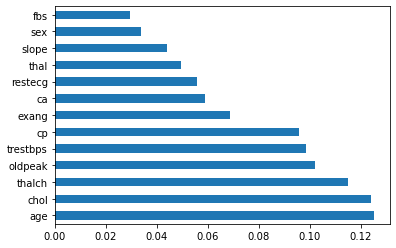

In [47]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

# Model Creation

Multiclass classification

# SVC

In [57]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train_scaled, y_train)


SVC()

In [59]:
# Predicting the Test set results
y_pred = classifier.predict(X_test_scaled)


# Model Evalution

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train_scaled)
cm_train = confusion_matrix(y_pred_train, y_train)


In [61]:
y_pred_train

array([3, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 3, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 3, 1, 1, 0, 1, 0, 2, 0, 0, 3, 0, 1, 1, 2,
       2, 0, 3, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 3, 0, 1,
       1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 0, 1, 1, 2,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 3, 3, 0, 0, 1, 1, 0, 3, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 3, 3, 1, 3, 1, 1, 0,
       0, 1, 3, 0, 1, 0, 0, 1, 1, 0, 3, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       3, 0, 0, 3, 1, 0, 0, 3, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 3, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 3, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [78]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.66      0.76       101
           1       0.54      0.45      0.49        64
           2       0.12      0.30      0.17        10
           3       0.04      0.11      0.06         9
           4       0.00      0.00      0.00         0

    accuracy                           0.54       184
   macro avg       0.32      0.31      0.30       184
weighted avg       0.69      0.54      0.60       184



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
print(accuracy_score(y_pred,y_test))

0.5434782608695652
